# Model K-means

This Jupyter notebook is used to:

1. Run PCA.
2. Run K-means.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.39282,0.03316,0.00002,0.80153,0.00009,0.00037,0.00096,0.00680,0.00000,...,40,1,tcp,none,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:35:59.65674Z
1,1.00000,0.39394,0.03317,0.00003,0.80177,0.00009,0.00042,0.00096,0.00680,0.00001,...,141,2,tcp,none,RSTR,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:35:59.659567Z
2,1.00000,0.62823,0.52613,0.03557,0.80557,0.00315,0.00774,0.01248,0.00680,0.01245,...,91820,54,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:50:46.362101Z
3,1.00000,0.30051,0.62972,0.03261,0.80573,0.00242,0.00537,0.00832,0.00680,0.00750,...,55543,36,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:53:52.704343Z
4,1.00000,0.74686,0.07906,0.00000,0.75277,0.00160,0.00236,0.00416,0.00207,0.00000,...,0,0,udp,dns,S0,orig_reg_or_dyn,resp_well_known,No,No,2017-07-07T16:37:22.211056Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.74686,0.67203,0.00000,0.91683,0.00019,0.00031,0.00064,0.00077,0.00002,...,210,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T16:55:08.800731Z
1,1.00000,0.74686,0.80684,0.00000,0.85009,0.00016,0.00028,0.00064,0.00077,0.00003,...,246,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T16:59:11.292703Z
2,1.00000,0.74686,0.78601,0.00003,0.85285,0.00042,0.00066,0.00128,0.00077,0.00003,...,348,4,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T16:58:33.820003Z
3,1.00000,0.74686,0.92404,0.00006,0.48356,0.00023,0.00035,0.00064,0.00077,0.00003,...,262,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T17:02:42.106866Z
4,1.00000,0.79892,0.16639,0.00000,0.81069,0.00000,0.00011,0.00032,0.12491,0.00000,...,40,1,tcp,none,REJ,orig_reg_or_dyn,resp_reg,No,No,2017-07-07T16:39:59.300719Z


In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 20719 rows and 293 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_p_cat_orig_reg_or_dyn,orig_p_cat_orig_well_known,resp_p_cat_resp_123,resp_p_cat_resp_21,resp_p_cat_resp_22,resp_p_cat_resp_443,resp_p_cat_resp_53,resp_p_cat_resp_80,resp_p_cat_resp_dyn,resp_p_cat_resp_reg,resp_p_cat_resp_well_known,connection.proto_icmp,connection.proto_tcp,connection.proto_udp,connection.service_dce_rpc,connection.service_dns,connection.service_ftp,connection.service_ftp-data,"connection.service_gssapi,dce_rpc,smb","connection.service_gssapi,krb,smb","connection.service_gssapi,ntlm,smb",connection.service_http,connection.service_krb,connection.service_krb_tcp,connection.service_none,connection.service_ntp,connection.service_smb,connection.service_ssh,connection.service_ssl,connection.conn_state_OTH,connection.conn_state_REJ,connection.conn_state_RSTO,connection.conn_state_RSTR,connection.conn_state_RSTRH,connection.conn_state_S0,connection.conn_state_S1,connection.conn_state_S2,connection.conn_state_SF,connection.conn_state_SHR,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_connection.protocol_mode_icmp,orig_orig_connection.protocol_mode_tcp,orig_orig_connection.protocol_mode_udp,orig_orig_connection.service_mode_dns,orig_orig_connection.service_mode_http,orig_orig_connection.service_mode_none,orig_orig_connection.service_mode_ssl,orig_orig_connection.conn_state_mode_OTH,orig_orig_connection.conn_state_mode_REJ,orig_orig_connection.conn_state_mode_RSTO,orig_orig_connection.conn_state_mode_SF,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_connection.protocol_mode_-,orig_resp_connection.protocol_mode_tcp,orig_resp_connection.protocol_mode_udp,orig_resp_connection.service_mode_-,orig_resp_connection.service_mode_dns,orig_resp_connection.service_mode_ftp,orig_resp_connection.service_mode_none,orig_resp_connection.service_mode_ssh,orig_resp_connection.conn_state_mode_-,orig_resp_connection.conn_state_mode_RSTO,orig_resp_connection.conn_state_mode_S0,orig_resp_connection.conn_state_mode_SF,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_re

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_RSTRH',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S2',
       'resp_resp_connection.conn_state_mode_SF'],
      dtype='object', length=204)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 204 principal components: 1.0000000000000002


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999983]
Variance Captured by First  10 Principal Components: [0.90874068]
Variance Captured by First   7 Principal Components: [0.87711171]
Variance Captured by First   5 Principal Components: [0.84247957]
Variance Captured by First   2 Principal Components: [0.75703424]
Variance Captured by the First Principal Component:  [0.61865425]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.38266842
Variance of connection.duration                       : 0.23598583
Variance of connection.orig_p                         : 0.08640474
Variance of connection.orig_bytes                     : 0.05197525
Variance of connection.orig_pkts                      : 0.03253360
Variance of connection.resp_p                         : 0.02857458
Variance of connection.resp_bytes                     : 0.02433716
Variance of connection.resp_pkts                      : 0.01939042
Variance of dns_count                                 : 0.01524173
Variance of ssh_count                                 : 0.01256765
Variance of http_count                                : 0.01013201
Variance of ssl_count                                 : 0.00892931
Variance of files_count                               : 0.00789565
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00718869
Variance of orig_p_cat_orig_well_known                : 0.0066

## 2. K-means

In [16]:
from datetime import datetime
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans

# Choose optimal K using Elbow method
score = []
inertia = []
print_info = []
computed_clusters = []
computed_clusters_fitted = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 25):
    try:
        km = KMeans(
            n_clusters=cluster, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        km_fitted = km.fit(pca_X)
        y_km = km.fit_predict(pca_X)
        computed_clusters.append(km)
        computed_clusters_fitted.append(km_fitted)
        score.append(km.score(pca_X))
        inertia.append(km.inertia_)
        print_str = 'Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S"))
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:58:30.
Cluster initiation:  1 (00:58:33)
Cluster initiation:  2 (00:58:40)
Cluster initiation:  3 (00:58:49)
Cluster initiation:  4 (00:58:57)
Cluster initiation:  5 (00:59:05)
Cluster initiation:  6 (00:59:13)
Cluster initiation:  7 (00:59:20)
Cluster initiation:  8 (00:59:35)
Cluster initiation:  9 (00:59:47)
Cluster initiation: 10 (01:00:01)
Cluster initiation: 11 (01:00:10)
Cluster initiation: 12 (01:00:18)
Cluster initiation: 13 (01:00:26)
Cluster initiation: 14 (01:00:34)
Cluster initiation: 15 (01:00:44)
Cluster initiation: 16 (01:00:59)
Cluster initiation: 17 (01:01:09)
Cluster initiation: 18 (01:01:21)
Cluster initiation: 19 (01:01:27)
Cluster initiation: 20 (01:01:34)
Cluster initiation: 21 (01:01:40)
Cluster initiation: 22 (01:01:46)
Cluster initiation: 23 (01:01:52)
Cluster initiation: 24 (01:01:57)
Done at 01:01:57.


In [17]:
score

[-224628.52031887133,
 -144378.60367939997,
 -92512.96178252548,
 -79743.81011318289,
 -72183.82732029767,
 -65797.29455178561,
 -62114.15857414344,
 -56074.75815267163,
 -54232.7963389177,
 -52182.16326050276,
 -48398.748845958304,
 -47421.038058122474,
 -45080.964694292525,
 -42465.76108159996,
 -42053.72535453542,
 -39960.97267142282,
 -38699.2823940265,
 -37067.715159101455,
 -37982.43153149617,
 -34945.04666256651,
 -33562.65688674195,
 -31823.655219339034,
 -31470.300771861133,
 -30999.035470958996]

In [18]:
inertia

[224628.52031887133,
 144378.60367939997,
 92512.96178252548,
 79743.81011318289,
 72183.82732029767,
 65797.29455178561,
 62114.15857414344,
 56074.75815267163,
 54232.7963389177,
 52182.16326050276,
 48398.748845958304,
 47421.038058122474,
 45080.964694292525,
 42465.76108159996,
 42053.72535453542,
 39960.97267142282,
 38699.2823940265,
 37067.715159101455,
 37982.43153149617,
 34945.04666256651,
 33562.65688674195,
 31823.655219339034,
 31470.300771861133,
 30999.035470958996]

In [19]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': inertia})

In [20]:
df_cost

,Cluster,Cost
0,1,224628.52032
1,2,144378.60368
2,3,92512.96178
3,4,79743.81011
4,5,72183.82732
5,6,65797.29455
6,7,62114.15857
7,8,56074.75815
8,9,54232.79634
9,10,52182.16326


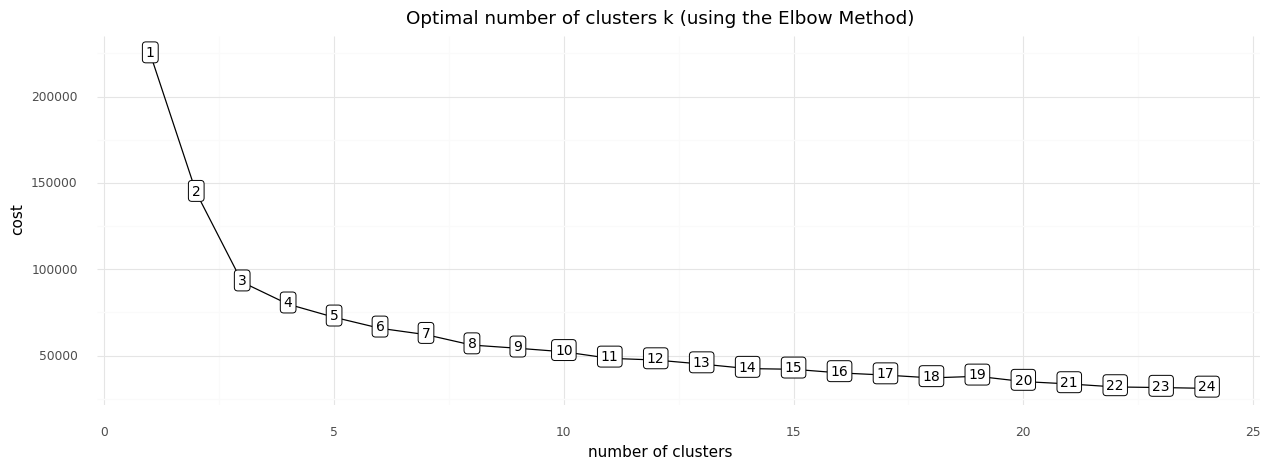

<ggplot: (8781184521614)>

In [21]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [52]:
# Fit the cluster
OPTIMAL_K = 2

kmeans = computed_clusters[OPTIMAL_K]

In [53]:
# Cluster centorid
kmeans.cluster_centers_

array([[ 2.47476071e+00, -6.14378172e-01,  7.50597086e-02,
         5.89448853e-02,  4.57770562e-02,  2.81729051e-03,
        -2.26464056e-02,  1.27495835e-02,  3.07094093e-02,
        -1.50698388e-03, -8.38515947e-03,  2.74759704e-03,
         2.80220716e-03, -8.86306824e-03,  4.48456866e-03,
         1.66041328e-03,  2.69181442e-03, -4.31483636e-03,
         2.79850751e-03,  1.83093113e-04,  3.14065002e-03,
        -4.38093714e-03, -3.37137496e-04, -3.10504510e-03,
        -4.41673029e-03,  1.71482349e-05,  1.06132946e-03,
        -8.88046950e-04, -1.17511251e-03, -3.00844252e-03,
         4.01599860e-03,  1.71084851e-05, -1.82809456e-03,
         2.04678903e-03,  2.54827294e-03,  2.18304601e-04,
        -4.22683856e-03, -4.04468703e-03,  9.08670710e-04,
         1.41501013e-03,  2.24671772e-04, -1.60127183e-05,
        -1.26175396e-03, -1.47650368e-04,  1.87458754e-04,
         4.41786991e-04,  2.76513322e-04, -1.15050030e-03,
        -5.03451643e-04,  9.27067090e-04,  2.11098682e-0

In [54]:
# Check the iteration of the clusters created
kmeans.n_iter_

4

In [55]:
# Check the cost of the clusters created
kmeans.inertia_

92512.96178252548

In [56]:
# Add cluster labels to original dataframe
pca_X['cluster'] = kmeans.labels_
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [57]:
pca_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,cluster,cluster_cat
0,-2.13736,-1.04532,0.84560,0.43130,-0.34077,-0.01163,-0.08889,0.14287,-0.04571,-0.13877,0.45238,-0.33420,-0.67204,0.33821,-0.05609,-0.15548,0.22869,-0.21809,0.05835,0.08177,-0.01072,-0.07293,-0.03100,-0.00796,0.07860,-0.06971,0.08327,0.01427,0.02102,-0.06312,0.06975,0.06228,-0.04812,-0.06953,0.03905,-0.04514,-0.11989,0.06134,-0.13409,0.05256,0.04175,-0.05316,0.14305,0.03533,0.06823,-0.00617,-0.02014,0.03116,-0.02705,0.01578,-0.01630,0.04202,0.04740,-0.01595,-0.00318,0.06125,0.07767,-0.02705,-0.00409,-0.01112,0.01603,0.03969,-0.00560,0.01688,0.03235,0.04191,0.01668,-0.01776,0.00383,-0.02665,0.01415,0.00532,-0.02129,-0.01122,-0.01629,0.00213,-0.01409,-0.00444,-0.01338,0.01167,0.00199,0.00938,-0.00954,0.01422,-0.01144,0.01098,0.00203,-0.00609,0.00027,-0.01258,-0.00917,-0.00816,0.00036,-0.01630,0.00047,0.00030,-0.00205,-0.00492,-0.00162,0.00099,-0.00195,-0.00341,-0.00360,-0.00412,0.00176,0.00194,-0.00441,0.00117,-0.00218,0.00002,0.00306,0.00902,-0.00032,-0.00194,-0.00060,0.00330,-0.00455,0.00634,-0.00526,0.00150,0.00338,0.00534,-0.00725,0.00558,0.00229,0.00701,-0.00040,-0.00304,0.00240,0.00283,-0.00471,0.00015,-0.00120,-0.00091,0.00217,0.00123,0.00092,0.00011,-0.00010,0.00113,-0.00032,0.00034,-0.00068,0.00032,-0.00009,-0.00003,0.00007,0.00021,-0.00028,-0.00007,-0.00000,0.00021,0.00027,0.00035,-0.00005,-0.00014,0.00003,-0.00008,-0.00052,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,2,2
1,-2.03539,-0.87398,0.99066,0.54812,-0.28186,-0.08872,0.16697,-0.07227,-0.25231,-0.06907,0.28431,-0.14140,0.23223,0.01247,-0.06815,0.10184,-0.01487,0.11543,-0.02920,-0.06460,-0.02625,0.12806,0.28268,0.05264,-0.19778,-0.12624,0.01661,-0.03163,0.06981,0.00235,0.01169,0.00692,0.02319,-0.06103,-0.00831,-0.10238,0.06900,-0.06556,0.26694,-0.00699,-0.11422,0.10213,-0.01377,-0.05856,-0.00754,0.04781,0.03310,0.05437,0.04978,-0.03798,0.12979,0.00693,-0.00568,-0.04371,0.03791,-0.03329,-0.03868,0.01711,-0.00198,0.00617,-0.00433,-0.00712,-0.00324,-0.04983,0.00592,-0.00092,-0.02109,0.01400,0.02663,-0.01674,-0.00481,-0.01755,0.00586,0.02617,-0.01199,-0.00838,-0.00944,-0.02198,0.00403,-0.00315,0.00492,-0.00488,0.00356,0.01502,-0.00575,0.00488,-0.00430,-0.00669,-0.00786,0.00358,0.00465,-0.00024,0.00121,0.00561,-0.00013,0.00499,-0.00866,-0.02819,0.01427,0.00154,0.01243,0.00785,-0.00612,-0.01819,0.00163,-0.00479,0.00587,-0.00220,0.00592,0.00367,-0.00360,-0.00667,0.00517,-0.00032,0.00138,0.00585,0.00629,-0.01061,0.01014,-0.00092,-0.01102,0.00297,-0.01752,0.02215,0.00069,-0.00424,-0.00097,-0.00028,0.00091,0.00307,-0.00185,-0.00085,0.00151,0.00092,0.00254,-0.00250,-0.00115,-0.00009,0.00031,0.00045,0.00043,-0.00082,0.00071,-0.00028,-0.00002,0.00028,-0.00042,0.00034,-0.00067,0.00115,0.00010,0.00046,-0.00023,0.00005,-0.00023,-0.00038,0.00007,-0.00006,0.00006,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0

In [58]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 196,           197,           198,           199,
                 200,           201,           202,           203,
           'cluster', 'cluster_cat'],
      dtype='object', length=206)

In [59]:
pca_X['cluster'].value_counts()

2    8908
0    7719
1    4092
Name: cluster, dtype: int64

## 3. Results

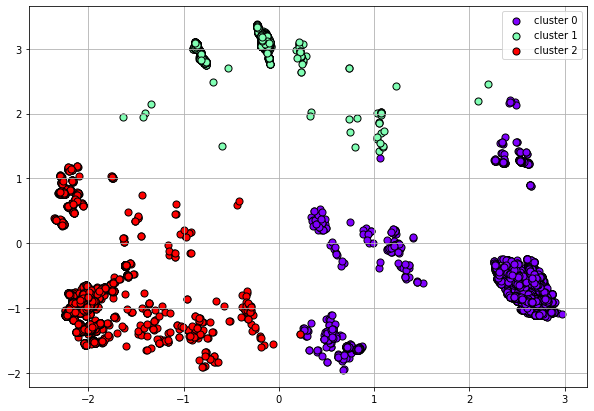

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)
# plt.rcParams["figure.figsize"] = (5.0,5.0) # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

plt.rcParams["figure.figsize"] = (10,7)
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kmeans.labels_ == i, 0], pca_X_array[kmeans.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [61]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kmeans.labels_ == i, 0], 
                   pca_X_array[kmeans.labels_ == i, 1], 
                   pca_X_array[kmeans.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

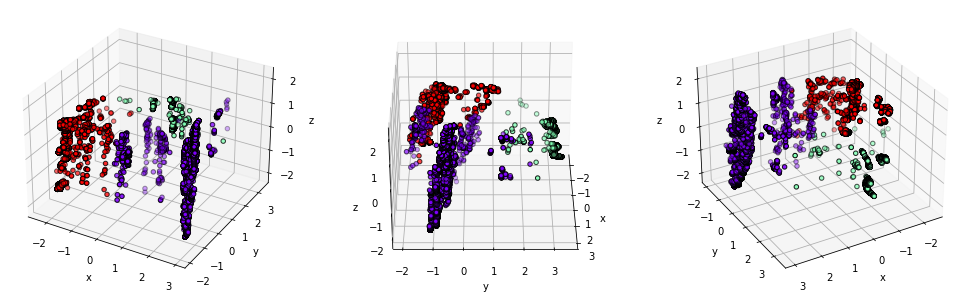

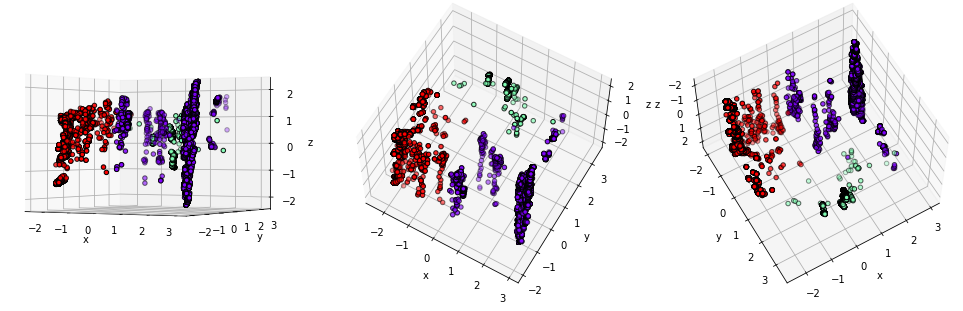

In [62]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [63]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [64]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,cluster,cluster_cat,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,-2.13736,-1.04532,0.84560,0.43130,-0.34077,-0.01163,-0.08889,0.14287,-0.04571,-0.13877,0.45238,-0.33420,-0.67204,0.33821,-0.05609,-0.15548,0.22869,-0.21809,0.05835,0.08177,-0.01072,-0.07293,-0.03100,-0.00796,0.07860,-0.06971,0.08327,0.01427,0.02102,-0.06312,0.06975,0.06228,-0.04812,-0.06953,0.03905,-0.04514,-0.11989,0.06134,-0.13409,0.05256,0.04175,-0.05316,0.14305,0.03533,0.06823,-0.00617,-0.02014,0.03116,-0.02705,0.01578,-0.01630,0.04202,0.04740,-0.01595,-0.00318,0.06125,0.07767,-0.02705,-0.00409,-0.01112,0.01603,0.03969,-0.00560,0.01688,0.03235,0.04191,0.01668,-0.01776,0.00383,-0.02665,0.01415,0.00532,-0.02129,-0.01122,-0.01629,0.00213,-0.01409,-0.00444,-0.01338,0.01167,0.00199,0.00938,-0.00954,0.01422,-0.01144,0.01098,0.00203,-0.00609,0.00027,-0.01258,-0.00917,-0.00816,0.00036,-0.01630,0.00047,0.00030,-0.00205,-0.00492,-0.00162,0.00099,-0.00195,-0.00341,-0.00360,-0.00412,0.00176,0.00194,-0.00441,0.00117,-0.00218,0.00002,0.00306,0.00902,-0.00032,-0.00194,-0.00060,0.00330,-0.00455,0.00634,-0.00526,0.00150,0.00338,0.00534,-0.00725,0.00558,0.00229,0.00701,-0.00040,-0.00304,0.00240,0.00283,-0.00471,0.00015,-0.00120,-0.00091,0.00217,0.00123,0.00092,0.00011,-0.00010,0.00113,-0.00032,0.00034,-0.00068,0.00032,-0.00009,-0.00003,0.00007,0.00021,-0.00028,-0.00007,-0.00000,0.00021,0.00027,0.00035,-0.00005,-0.00014,0.00003,-0.00008,-0.00052,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,2,2,CkiYui4USx0EfT3JQc,1.00000,192.168.10.15,0.74686,192.168.10.3,2017-07-07T16:55:08.800731Z,0.67203,0.00023,0.00000,udp,dns,SF,0.91683,60084,orig_reg_or_dyn,0.00019,76,0.00064,2,0.00077,53,resp_53,0.00002,154,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1,-2.03539,-0.87398,0.99066,0.54812,-0.28186,-0.08872,0.16697,-0.07227,-0.25231,-0.06907,0.28431,-0.14140,0.23223,0.01247,-0.06815,0.10184,-0.01487,0.11543,-0.02920,-0.06460,-0.02625,0.12806,0.28268,0.05264,-0.19778,-0.12624,0.01661,-0.03163,0.06981,0.00235,0.01169,0.00692,0.02319,-0.06103,-0.00831,-0.10238,0.06900,-0.06556,0.26694,-0.00699,-0.11422,0.10213,-0.01377,-0.05856,-0.00754,0.04781,0.03310,0.05437,0.04978,-0.03798,0.12979,0.00693,-0.00568,-0.04371,0.03791,-0.03329,-0.03868,0.01711,-0.00198,0.00617,-0.00433,-0.00712,-0.00324,-0.04983,0.00592,-0.00092,-0.02109,0.01400,0.02663,-0.01674,-0.00481,-0.01755,0.00586,0.02617,-0.01199,-0.00838,-0.00944,-0.02198,0.00403,-0.00315,0.00492,-0.00488,0.00356,0.01502,-0.00575,0.00488,-0.00430,-0.00669,-0.00786,0.00358,0.00465,-0.00024,0.00121,0.00561,-0.0001

In [66]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [67]:
print('Time:')
print_df_func(result, 'timestamp', 'min')
print_df_func(result, 'timestamp', 'max')

Time:
timestamp min = 2017-07-07T16:35:00.003682Z
timestamp max = 2017-07-07T17:04:58.735517Z



In [68]:
plt.rcParams["figure.figsize"] = (10,7)

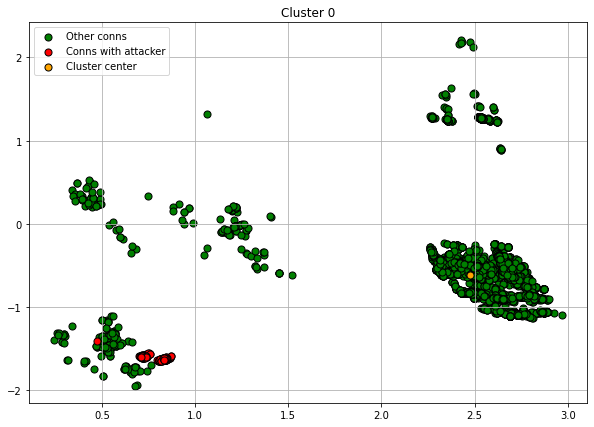

Total num of conns: 7719

Attacker conns ratio:
No     7492
Yes     227
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    2420
192.168.10.19    1095
192.168.10.15     861
192.168.10.16     764
192.168.10.5      600
192.168.10.8      528
192.168.10.9      520
192.168.10.17     242
172.16.0.1        227
192.168.10.25     218
192.168.10.12     179
192.168.10.51      58
192.168.10.3        6
192.168.10.50       1
Name: originated_ip, dtype: int64

67.72.99.137      479
192.168.10.50     386
205.174.165.73    363
178.255.83.1      165
162.208.20.178    133
                 ... 
54.64.179.218       1
107.20.191.152      1
35.163.146.116      1
172.217.6.202       1
172.217.10.242      1
Name: responded_ip, Length: 1494, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:00.003682Z
timestamp max = 2017-07-07T17:04:58.735517Z

Cluster 0 NOK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
4740,CTC0yf4eBsSk6l2lO7,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:56:46.733149Z,0.72647,0.00066,0.00000,tcp,none,RSTO,0.86420,56635,orig_reg_or_dyn,0.00000,0,0.00064,2,0.00029,22,resp_22,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
16415,CTRufTAyUOdmpZezj,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:59:09.938889Z,0.80609,0.00012,0.00000,tcp,none,REJ,0.80992,53078,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00680,443,resp_443,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
13049,CbqJ4o2z8qil02Njec,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:56:08.820374Z,0.70540,0.00060,0.00000,tcp,none,RSTO,0.69822,45758,orig_reg_or_dyn,0.00000,0,0.00064,2,0.00119,80,resp_80,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
2276,CBPOA62AobgOHDISHd,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:56:46.733243Z,0.72647,0.00057,0.00000,tcp,none,RSTO,0.86420,56635,orig_reg_or_dyn,0.00000,0,0.00064,2,0.00028,21,resp_21,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
11709,CWfIEQCOggWC0fXvj,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T17:00:05.383299Z,0.83691,0.00080,0.00000,tcp,none,RSTO,0.51574,33800,orig_reg_or_dyn,0.00000,0,0.00096,3,0.00028,21,resp_21,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
14240,CO7Btd1Vp8Q0F6zbsi,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T17:00:34.815495Z,0.85327,0.00059,0.00000,tcp,none,RSTO,0.88418,57944,orig_reg_or_dyn,0.00000,0,0.00096,3,0.00028,21,resp_21,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
9310,CIjyjM21ln6riJZhYl,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:56:02.43423Z,0.70184,0.00078,0.00000,tcp,none,RSTO,0.74873,49068,orig_reg_or_dyn,0.00000,0,0.00064,2,0.00028,21,resp_21,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
6068,ClMHMX30Q9PEj0esn5,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:57:09.465721Z,0.73911,0.00072,0.00000,tcp,none,RSTO,0.65024,42614,orig_reg_or_dyn,0.00000,0,0.00064,2,0.00028,21,resp_21,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
20554,CEqSDT3wUXRyA2iMH3,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:59:56.086409Z,0.83174,0.00014,0.00000,tcp,none,REJ,0.83095,54456,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00680,443,resp_443,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
766,Cy4q5r4F93uXlVZLS7,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:56:02.431331Z,0.70184,0.00002,0.00000,tcp,none,REJ,0.74873,49068,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00680,443,resp_443,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes


Cluster 0 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
11868,CYA2Ox2WIZf1TaXNR4,1.00000,192.168.10.9,0.07190,23.194.140.172,2017-07-07T16:48:29.062886Z,0.44979,115.44532,0.12914,tcp,ssl,RSTR,0.11227,7360,orig_reg_or_dyn,0.00180,733,0.00704,22,0.00680,443,resp_443,0.00058,4117,0.00686,22,0.00000,0.00000,0.00000,1.00000,0.05128,No,No
12886,CaIFOK2GC8YOFphYuk,1.00000,192.168.10.14,0.11589,34.196.94.10,2017-07-07T16:35:03.466968Z,0.00193,50.00115,0.05593,tcp,none,SF,0.81741,53569,orig_reg_or_dyn,0.00000,1,0.00224,7,0.00119,80,resp_80,0.00000,0,0.00218,7,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
6336,C7TCNR17qzn9hn7DC3,1.00000,192.168.10.19,0.24583,67.72.99.137,2017-07-07T16:36:46.232398Z,0.05906,0.07760,0.00009,tcp,http,SF,0.83148,54491,orig_reg_or_dyn,0.00722,2931,0.00192,6,0.00119,80,resp_80,0.00002,153,0.00218,7,0.00000,0.00000,1.00000,0.00000,0.00000,No,No
7858,Cj9FQI3yoWVGKGLcY7,1.00000,192.168.10.8,0.39287,104.19.194.102,2017-07-07T16:50:06.915454Z,0.50420,0.13236,0.00015,tcp,ssl,SF,0.08547,5604,orig_reg_or_dyn,0.00209,849,0.00448,14,0.00680,443,resp_443,0.00074,5327,0.00405,13,0.00000,0.00000,0.00000,1.00000,0.10256,No,No
9029,CZYhHg4UL8tT4cSTmh,1.00000,192.168.10.19,0.26502,72.21.91.29,2017-07-07T16:36:07.099844Z,0.03730,120.96703,0.13532,tcp,http,SF,0.92855,60852,orig_reg_or_dyn,0.00215,874,0.00608,19,0.00119,80,resp_80,0.00022,1592,0.00499,16,0.00000,0.00000,1.00000,0.00000,0.10256,No,No
8324,CW2wvw3ndotfLSW62b,1.00000,192.168.10.14,0.39282,104.16.87.26,2017-07-07T16:38:29.098682Z,0.11625,180.46172,0.20188,tcp,ssl,SF,0.83725,54869,orig_reg_or_dyn,0.00230,934,0.00640,20,0.00680,443,resp_443,0.00088,6267,0.00561,18,0.00000,0.00000,0.00000,1.00000,0.10256,No,No
3203,CHJ39H2VuqDHw3vUXg,1.00000,192.168.10.15,0.06983,23.61.187.27,2017-07-07T16:47:15.386335Z,0.40883,40.59781,0.04542,tcp,http,SF,0.84029,55068,orig_reg_or_dyn,0.00106,431,0.00320,10,0.00119,80,resp_80,0.00025,1806,0.00280,9,0.00000,0.00000,1.00000,0.00000,0.05128,No,No
10637,CEeCb533FcsoLITZXd,1.00000,192.168.10.17,0.74475,192.33.31.168,2017-07-07T16:52:29.769219Z,0.58361,0.22838,0.00026,tcp,ssl,SF,0.83071,54440,orig_reg_or_dyn,0.00093,378,0.00384,12,0.00680,443,resp_443,0.00147,10527,0.00312,10,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
10931,Ccd7PM0hlYjSYYzie,1.00000,192.168.10.14,0.18487,52.7.85.172,2017-07-07T16:40:34.798827Z,0.18613,61.39312,0.06868,tcp,ssl,SF,0.84130,55134,orig_reg_or_dyn,0.00313,1271,0.00608,19,0.00680,443,resp_443,0.00077,5503,0.00530,17,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
19099,Cu1IbQ3xAmKF0bhdOd,1.00000,192.168.10.14,0.62760,162.208.20.178,2017-07-07T16:36:08.595981Z,0.03813,5.25759,0.00588,tcp,http,SF,0.83255,54561,orig_reg_or_dyn,0.00101,409,0.00192,6,0.00119,80,resp_80,0.00007,533,0.00156,5,0.00000,0.00000,1.00000,0.00000,0.02564,No,No


Protocol:
tcp    7572
udp     147
Name: protocol, dtype: int64

Service:
ssl                   3328
http                  2164
none                  1950
ntp                     86
ssh                     65
dns                     46
ftp                     35
ftp-data                35
gssapi,dce_rpc,smb      10
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    7593
orig_well_known     126
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           3649
resp_80            3255
resp_reg            395
resp_well_known     133
resp_22             108
resp_123             86
resp_21              77
resp_dyn             16
Name: resp_p_cat, dtype: int64




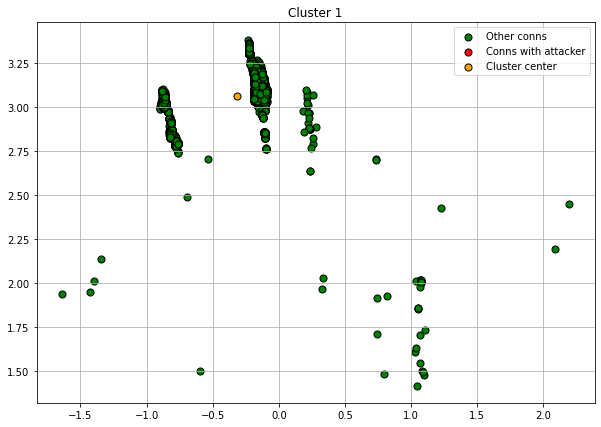

Total num of conns: 4092

Attacker conns ratio:
No    4092
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     4064
192.168.10.50      10
192.168.10.17       9
192.168.10.12       4
192.168.10.16       3
192.168.10.19       2
Name: originated_ip, dtype: int64

192.168.10.1       4026
224.0.0.252          19
192.168.10.255       16
207.210.46.249        3
198.100.147.178       3
198.50.139.209        2
144.217.95.60         2
67.215.197.149        2
108.59.2.24           1
198.206.133.14        1
206.75.89.101         1
192.168.10.51         1
91.189.89.198         1
192.168.10.12         1
192.168.10.16         1
144.217.148.73        1
192.168.10.50         1
192.168.10.19         1
52.60.76.61           1
131.253.34.237        1
144.217.163.175       1
65.52.108.189         1
224.0.1.24            1
45.79.109.111         1
192.168.10.17         1
167.114.204.238       1
144.217.164.10        1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:00.013517Z
t

,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
6898,CLsgqa2UcCM4WLzW84,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:52:58.458032Z,0.59956,0.35985,0.00040,udp,dns,SF,0.94191,61727,orig_reg_or_dyn,0.00011,43,0.00032,1,0.00077,53,resp_53,0.00001,95,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
18933,ClgfGQ1MV6YpFbyGca,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:47:18.222116Z,0.41041,0.03096,0.00003,udp,dns,SF,0.94043,61630,orig_reg_or_dyn,0.00014,55,0.00032,1,0.00077,53,resp_53,0.00002,119,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
2947,CboB3PTQfvzRZJDHd,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:58:37.472154Z,0.78804,0.03067,0.00003,udp,dns,SF,0.93685,61396,orig_reg_or_dyn,0.00021,87,0.00032,1,0.00077,53,resp_53,0.00002,135,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
5149,Caw7mI1xQgHlW1fq51,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:51:09.189052Z,0.53882,0.06091,0.00007,udp,dns,SF,0.93202,61079,orig_reg_or_dyn,0.00014,57,0.00032,1,0.00077,53,resp_53,0.00002,161,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
12833,C6VOoF43HEnMYiV13l,1.00000,192.168.10.50,0.74686,192.168.10.255,2017-07-07T17:03:06.44623Z,0.93757,0.00005,0.00000,udp,none,S0,0.00206,138,orig_well_known,0.01443,5863,0.00832,26,0.00209,138,resp_well_known,0.00000,0,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
12690,CU7XP24IRNmPDIK9ie,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:36:44.943592Z,0.05834,0.03124,0.00003,udp,dns,SF,0.91909,60232,orig_reg_or_dyn,0.00012,48,0.00032,1,0.00077,53,resp_53,0.00002,113,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
12407,CgCq3C1uqxWYk6jPm9,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:54:57.637569Z,0.66582,0.03126,0.00003,udp,dns,SF,0.93833,61493,orig_reg_or_dyn,0.00010,42,0.00032,1,0.00077,53,resp_53,0.00002,123,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9281,CtkNcn1ThgUwLO2dq,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:53:02.25582Z,0.60168,0.03066,0.00003,udp,dns,SF,0.93144,61041,orig_reg_or_dyn,0.00011,44,0.00032,1,0.00077,53,resp_53,0.00001,86,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
16670,Cpxt5y4cYNI82UhYz4,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T17:04:32.519684Z,0.98543,0.06053,0.00007,udp,dns,SF,0.95387,62511,orig_reg_or_dyn,0.00011,46,0.00032,1,0.00077,53,resp_53,0.00002,113,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10168,CkO9zd4K0ji5ZX1Fx9,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T17:04:25.154707Z,0.98133,0.03141,0.00004,udp,dns,SF,0.91848,60192,orig_reg_or_dyn,0.00013,53,0.00032,1,0.00077,53,resp_53,0.00003,192,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    4090
tcp       2
Name: protocol, dtype: int64

Service:
dns     4061
ntp       22
none       9
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4046
orig_well_known      46
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            4025
resp_well_known      24
resp_123             22
resp_reg             19
resp_443              2
Name: resp_p_cat, dtype: int64




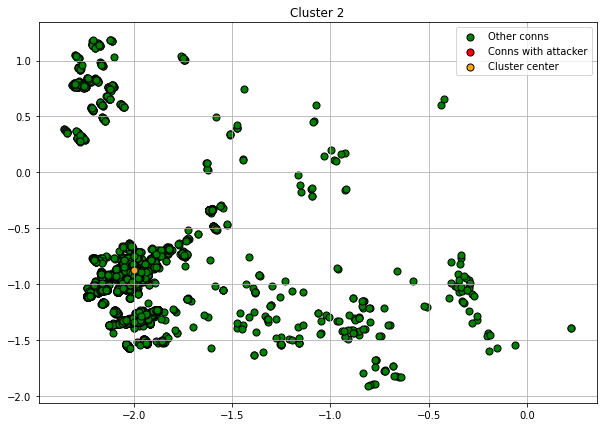

Total num of conns: 8908

Attacker conns ratio:
No    8908
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    3127
192.168.10.15     968
192.168.10.19     827
192.168.10.16     814
192.168.10.9      795
192.168.10.5      710
192.168.10.8      686
192.168.10.17     365
192.168.10.50     275
192.168.10.12     210
192.168.10.25     116
192.168.10.51      14
192.168.10.1        1
Name: originated_ip, dtype: int64

192.168.10.3     8866
192.168.10.50      42
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T16:35:00.013671Z
timestamp max = 2017-07-07T17:04:49.817692Z

Cluster 2 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
481,COAnBU30jc5m3obV2,1.00000,192.168.10.9,0.74686,192.168.10.3,2017-07-07T16:48:24.46226Z,0.44724,0.00018,0.00000,udp,dns,SF,0.91685,60085,orig_reg_or_dyn,0.00025,102,0.00064,2,0.00077,53,resp_53,0.00002,158,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
14492,C1PHdk359EdrD1tXW7,1.00000,192.168.10.14,0.74686,192.168.10.3,2017-07-07T16:40:35.49646Z,0.18652,0.03109,0.00003,udp,dns,SF,0.93450,61242,orig_reg_or_dyn,0.00069,280,0.00128,4,0.00077,53,resp_53,0.00004,304,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9645,CqLTjP11m3lrYnhDfb,1.00000,192.168.10.19,0.74686,192.168.10.3,2017-07-07T16:51:50.250222Z,0.56164,0.09168,0.00010,udp,dns,SF,0.64952,42567,orig_reg_or_dyn,0.00021,86,0.00064,2,0.00077,53,resp_53,0.00003,242,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9758,CQFlca4Kj2YbrJROgc,1.00000,192.168.10.50,0.74686,192.168.10.3,2017-07-07T16:55:22.548261Z,0.67967,0.00016,0.00000,udp,dns,SF,0.71725,47005,orig_reg_or_dyn,0.00011,46,0.00064,2,0.00077,53,resp_53,0.00001,46,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
18327,CL4y2b3Srdp9anMuka,1.00000,192.168.10.19,0.74686,192.168.10.3,2017-07-07T16:36:18.344479Z,0.04355,0.10035,0.00011,udp,dns,SF,0.70686,46324,orig_reg_or_dyn,0.00015,60,0.00064,2,0.00077,53,resp_53,0.00004,264,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3783,C1QEFh2mRNOC625qyj,1.00000,192.168.10.14,0.74686,192.168.10.3,2017-07-07T16:46:55.991908Z,0.39805,0.12301,0.00014,udp,dns,SF,0.81729,53561,orig_reg_or_dyn,0.00043,176,0.00128,4,0.00077,53,resp_53,0.00009,662,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9988,CKmCZ7EYxn7o4Kka5,1.00000,192.168.10.16,0.74686,192.168.10.3,2017-07-07T16:58:38.481119Z,0.78860,0.03185,0.00004,udp,dns,SF,0.90437,59267,orig_reg_or_dyn,0.00019,78,0.00064,2,0.00077,53,resp_53,0.00003,184,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9550,CClEzS2pn7YaU7uQLc,1.00000,192.168.10.8,0.74686,192.168.10.3,2017-07-07T16:36:52.474306Z,0.06253,0.00014,0.00000,udp,dns,SF,0.85451,56000,orig_reg_or_dyn,0.00019,78,0.00064,2,0.00077,53,resp_53,0.00002,110,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10424,CkIYLg2iNVC6DGPKc9,1.00000,192.168.10.9,0.74686,192.168.10.3,2017-07-07T16:48:30.488203Z,0.45059,0.04648,0.00005,udp,dns,SF,0.97609,63967,orig_reg_or_dyn,0.00016,64,0.00064,2,0.00077,53,resp_53,0.00004,256,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
13521,C9bxew2rt6XDxVK6P7,1.00000,192.168.10.14,0.74686,192.168.10.3,2017-07-07T16:46:52.700074Z,0.39622,0.00016,0.00000,udp,dns,SF,0.77777,50971,orig_reg_or_dyn,0.00018,72,0.00064,2,0.00077,53,resp_53,0.00002,136,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     8822
tcp       84
icmp       2
Name: protocol, dtype: int64

Service:
dns                8749
none                 79
krb                  30
ntp                  18
krb_tcp              10
dce_rpc               9
gssapi,krb,smb        8
gssapi,ntlm,smb       2
smb                   1
ftp                   1
ftp-data              1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8848
orig_well_known      60
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8699
resp_well_known     164
resp_reg             20
resp_123             18
resp_dyn              6
resp_21               1
Name: resp_p_cat, dtype: int64




In [69]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.scatter(
        kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster center'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Evaluation

**Rand index** *can't be used, requires labels.. (https://scikit-learn.org/stable/modules/clustering.html#rand-index)*


Notation: set `S = {1, 2, .. n}` of `x > 2` points, distance function `d(i,j)` measures distance between 2 points from S (d can be Euclidean, Manhattan, Chebyshev, Mahalanobis, .. alternatively similarity function can be used)


#### 3 axioms of Jon Kleinberg: 

- characteristics that a grouping problem shuld exhibit and can be considered "good", independently of alg used to find solution

1. **scale invariance**: `f(d) == f(alfa*d)` for any d and alfa > 0

2. **consistency**: if for every (i,j) from same cluster `d(i,j) >= d'(i,j)` and from different clusters `d(i,j) < d'(i,j)` then `f(d) == f(d')`

3. **wealth, richness**: every partition of S is a possible result of the clustering process

For every n >= 2 there is no clustering alg. that satysfies all three at once. 

2 measure of internal metrics: 

**cohesion** = between points in same cluster

**separation** = between points from different clusters



### Sum of Squared Error (SSE) 

(https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure)

Elbow Criterion 

- not available as a function in Scikit (we need to calculate SSE to evaluate K-Means using Elbow Criterion)

**Idea of Elbow Criterion method: choose `k` (number of cluster) at which the SSE decreases abruptly.**

(Small values indicate good quality.)

SSE = sum of squared distance between each member of the cluster and its centroid

SSE tends to decrease toward 0 as we increase k (SSE=0, when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

=> goal: choose a small value of k that still has a low SSE, and the elbow usually represents, where we start to have diminishing returns by increasing k

If the line graph looks like an arm, the "elbow" on the arm is the value of optimal k (number of cluster). 

## Metrics that quantify level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

Single pass eval:

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

sse = {}
sil = {}
ch = {}
db = {}

from sklearn.cluster import KMeans
from sklearn import metrics

for k in range(2, len(computed_clusters)):
# for k in range(OPTIMAL_K, OPTIMAL_K + 1):
    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    km = computed_clusters[k]
    km_fit = computed_clusters_fitted[k]
    
    print('K=' + str(k + 1) + ' clusters: ')
    
    sse_score = km_fit.inertia_   
    sse[k] = sse_score
    print('Sum of Squared Error for k = ' + str(k + 1) + ': ' + str(sse_score))
    
    ch_score = metrics.calinski_harabasz_score(pca_X, km_fit.labels_)
    ch[k] = ch_score
    print('Calisnki-Harabasz Coefficient for k = ' + str(k + 1) + ': ' + str(ch_score))
    
    db_score = davies_bouldin_score(pca_X, km_fit.labels_)
    db[k] = db_score
    print('Davies-Bouldin Index for k = ' + str(k + 1) + ': ' + str(db_score))
    
    sil_score = metrics.silhouette_score(pca_X, km.labels_, metric='euclidean')
    sil[k] = sil_score
    print('Silhouette Score for k = ' + str(k + 1) + ': ' + str(sil_score))
    
    print('End at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    print('--')

Start at 01:02:18.
K=3 clusters: 
Sum of Squared Error for k = 3: 92512.96178252548
Calisnki-Harabasz Coefficient for k = 3: 19775.88921513332
Davies-Bouldin Index for k = 3: 0.7822002480954823
Silhouette Score for k = 3: 0.49368054123643196
End at 01:02:24.
--
Start at 01:02:24.
K=4 clusters: 
Sum of Squared Error for k = 4: 79743.81011318289
Calisnki-Harabasz Coefficient for k = 4: 16315.35015510916
Davies-Bouldin Index for k = 4: 1.1952797058278204
Silhouette Score for k = 4: 0.45083048627413336
End at 01:02:30.
--
Start at 01:02:30.
K=5 clusters: 
Sum of Squared Error for k = 5: 72183.82732029767
Calisnki-Harabasz Coefficient for k = 5: 15853.612934013858
Davies-Bouldin Index for k = 5: 1.109900285439675
Silhouette Score for k = 5: 0.4877574605404891
End at 01:02:37.
--
Start at 01:02:37.
K=6 clusters: 
Sum of Squared Error for k = 6: 65797.29455178561
Calisnki-Harabasz Coefficient for k = 6: 14222.318158979748
Davies-Bouldin Index for k = 6: 1.2449721792316273
Silhouette Score for

In [41]:
sse

{2: 92512.96178252548,
 3: 79743.81011318289,
 4: 72183.82732029767,
 5: 65797.29455178561,
 6: 62114.15857414344,
 7: 56074.75815267163,
 8: 54232.7963389177,
 9: 52182.16326050276,
 10: 48398.748845958304,
 11: 47421.038058122474,
 12: 45080.964694292525,
 13: 42465.76108159996,
 14: 42053.72535453542,
 15: 39960.97267142282,
 16: 38699.2823940265,
 17: 37067.715159101455,
 18: 37982.43153149617,
 19: 34945.04666256651,
 20: 33562.65688674195,
 21: 31823.655219339034,
 22: 31470.300771861133,
 23: 30999.035470958996}

In [42]:
ch

{2: 19775.88921513332,
 3: 16315.35015510916,
 4: 15853.612934013858,
 5: 14222.318158979748,
 6: 12695.097045884238,
 7: 12386.491589492729,
 8: 11107.116200108536,
 9: 10511.232590994003,
 10: 10325.243830563171,
 11: 9523.108188609234,
 12: 9343.302099428834,
 13: 9071.176414649564,
 14: 8516.890425973703,
 15: 8507.538012984161,
 16: 8154.27008427513,
 17: 7480.885991993037,
 18: 6892.446479650556,
 19: 7131.986155137218,
 20: 7082.625957472478,
 21: 7909.8466644176215,
 22: 6864.6343702047325,
 23: 6964.195364217525}

In [43]:
db

{2: 0.7822002480954823,
 3: 1.1952797058278204,
 4: 1.109900285439675,
 5: 1.2449721792316273,
 6: 1.43331147524874,
 7: 1.226645942410275,
 8: 1.4086647491276896,
 9: 1.2070956226753444,
 10: 1.1639546419683138,
 11: 1.2565686217647076,
 12: 1.3092885556651064,
 13: 1.2082352506264848,
 14: 1.2641605742177517,
 15: 1.2119917155462026,
 16: 1.4857000306970671,
 17: 1.382308561820317,
 18: 1.34193030807934,
 19: 1.2841359101996797,
 20: 1.2861804618750206,
 21: 1.2223214476692539,
 22: 1.2944693598071269,
 23: 1.3059562995206064}

In [44]:
sil

{2: 0.49368054123643196,
 3: 0.45083048627413336,
 4: 0.4877574605404891,
 5: 0.38014336089368794,
 6: 0.34330653027032576,
 7: 0.3656733705212832,
 8: 0.3187796073609739,
 9: 0.34063455934832915,
 10: 0.3494348936061381,
 11: 0.3412495140738738,
 12: 0.3521874795097681,
 13: 0.3455596986955375,
 14: 0.3272905185817134,
 15: 0.36516805950306563,
 16: 0.31492464833847045,
 17: 0.3341536326945397,
 18: 0.3191673335720826,
 19: 0.3415966089912563,
 20: 0.3605515063410346,
 21: 0.3782811392637408,
 22: 0.37241415976516673,
 23: 0.3706160884977975}

In [45]:
# 1: clusters are clearly distinguished
# 0: distance between clusters is not significant ('data are uniformly distributed throughout Euclidean space')
# -1: clusters are assigned the wrong way

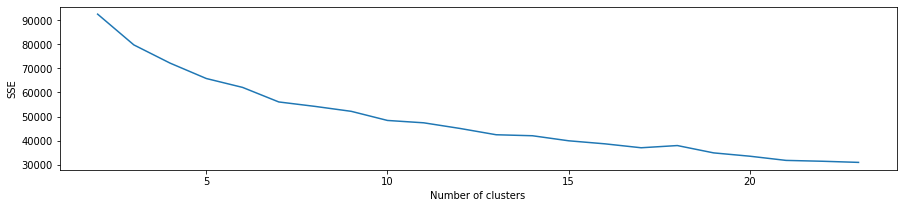

In [46]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
# plt.rcParams["figure.figsize"] = (15,3)
# plt.figure()
# sse_to_10 = { k: v for k, v in sse.items() if k <= 10 }  # zoom in
# plt.plot(list(sse_to_10.keys()), list(sse_to_10.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("SSE")
# plt.show()

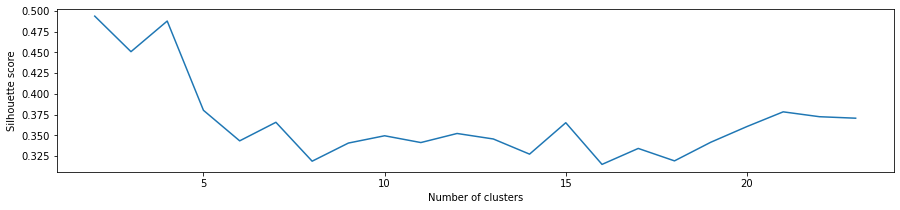

In [48]:
plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

## Interpretation

Parallel coordinates plots.

In [70]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

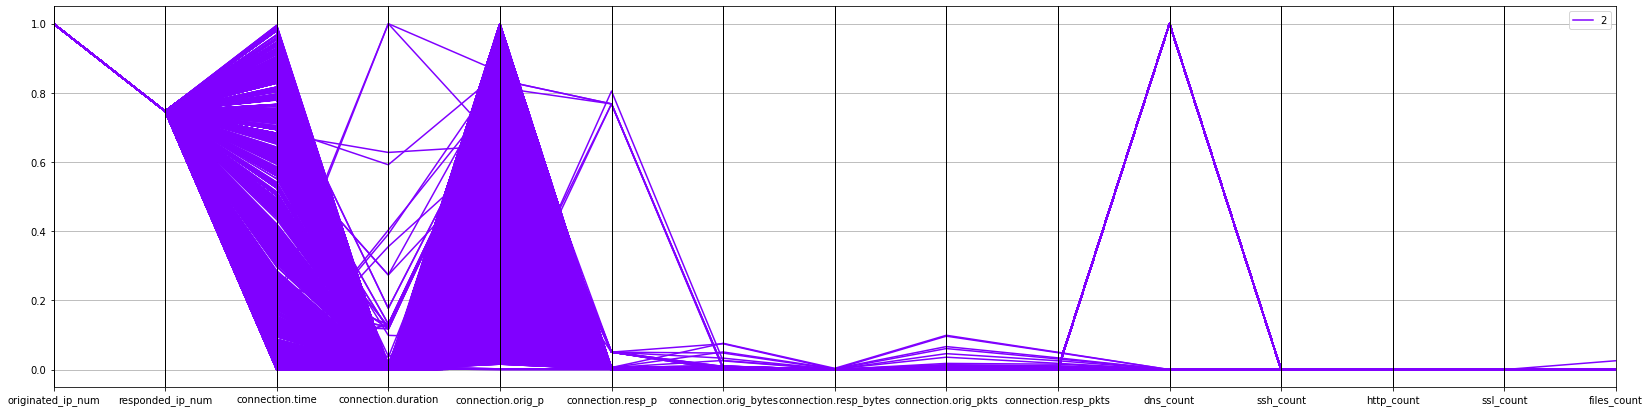

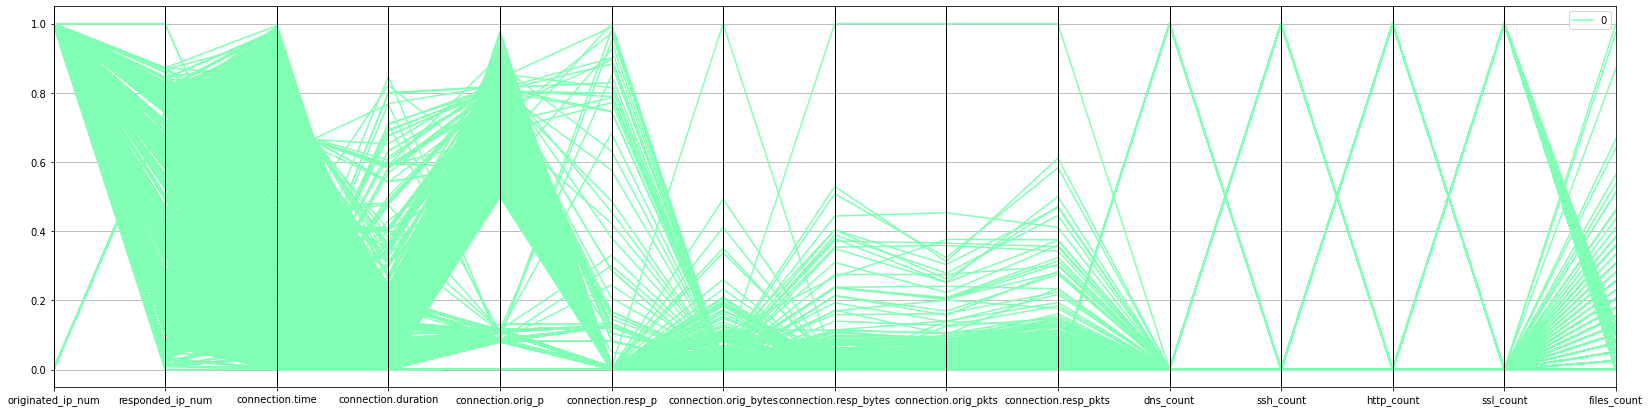

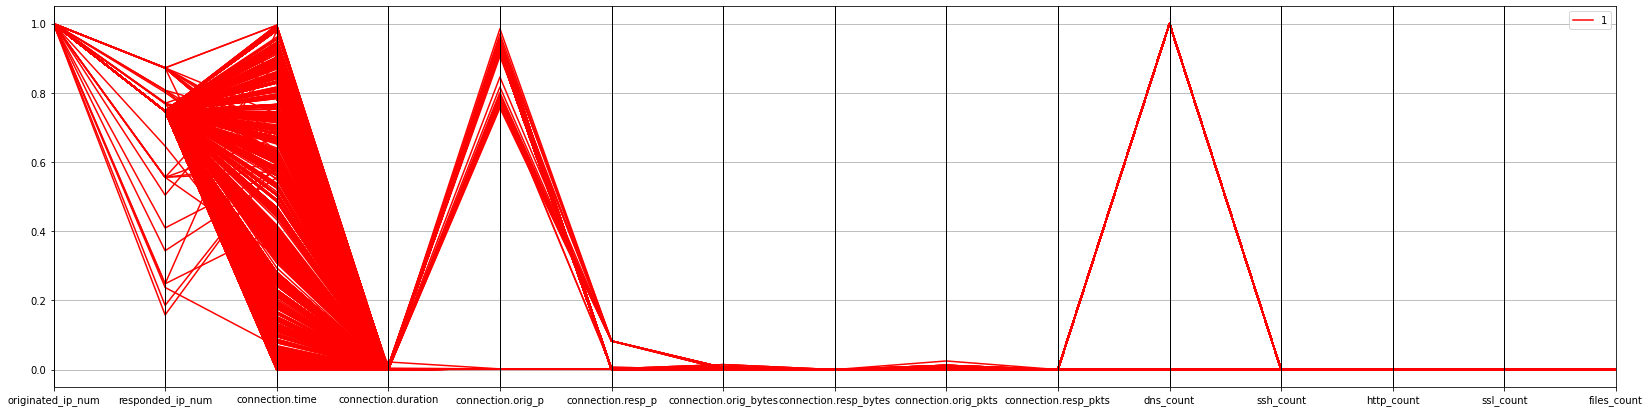

In [71]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

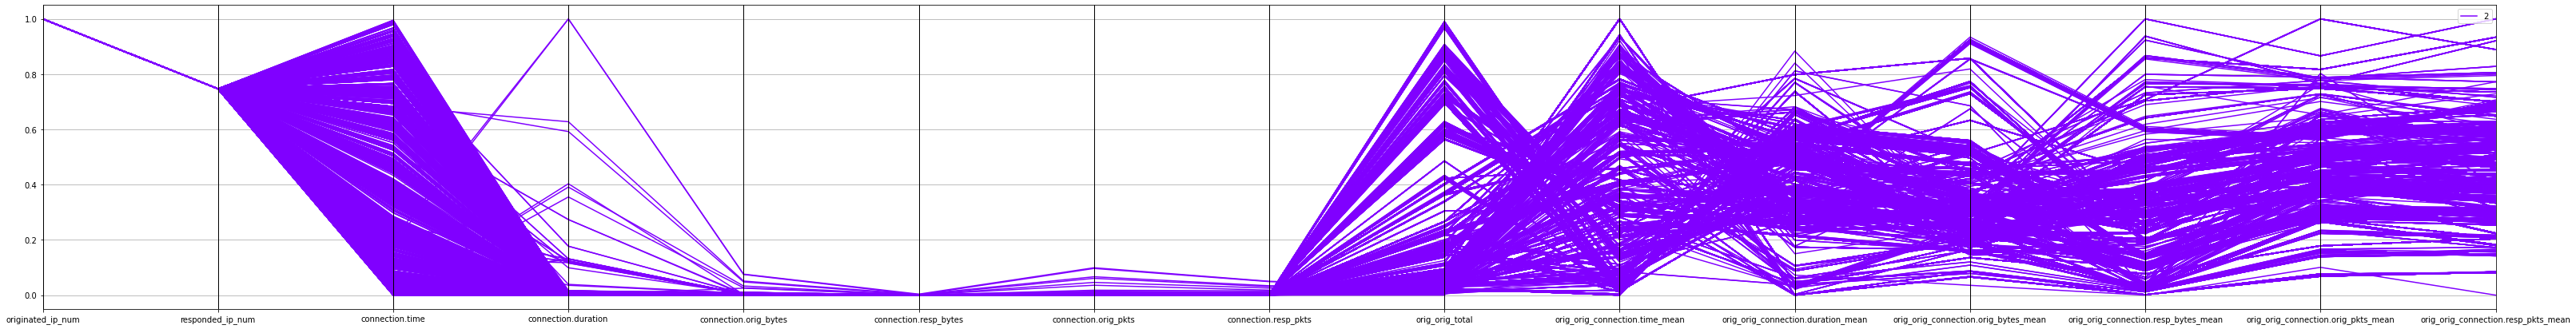

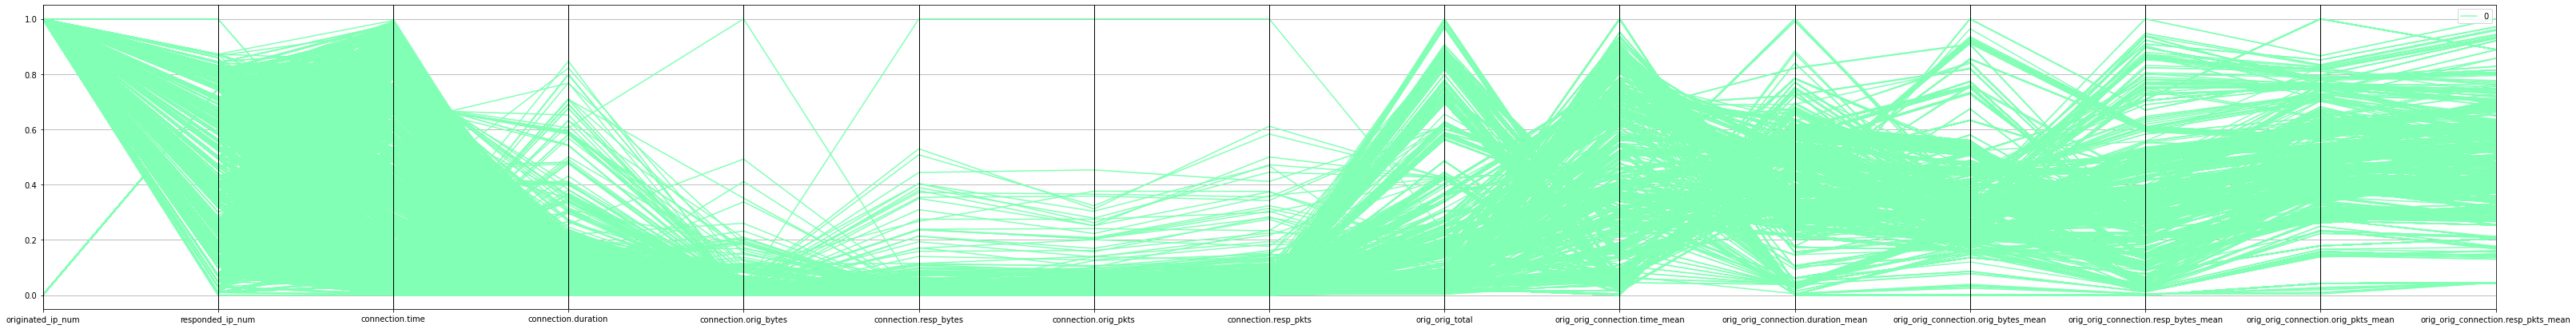

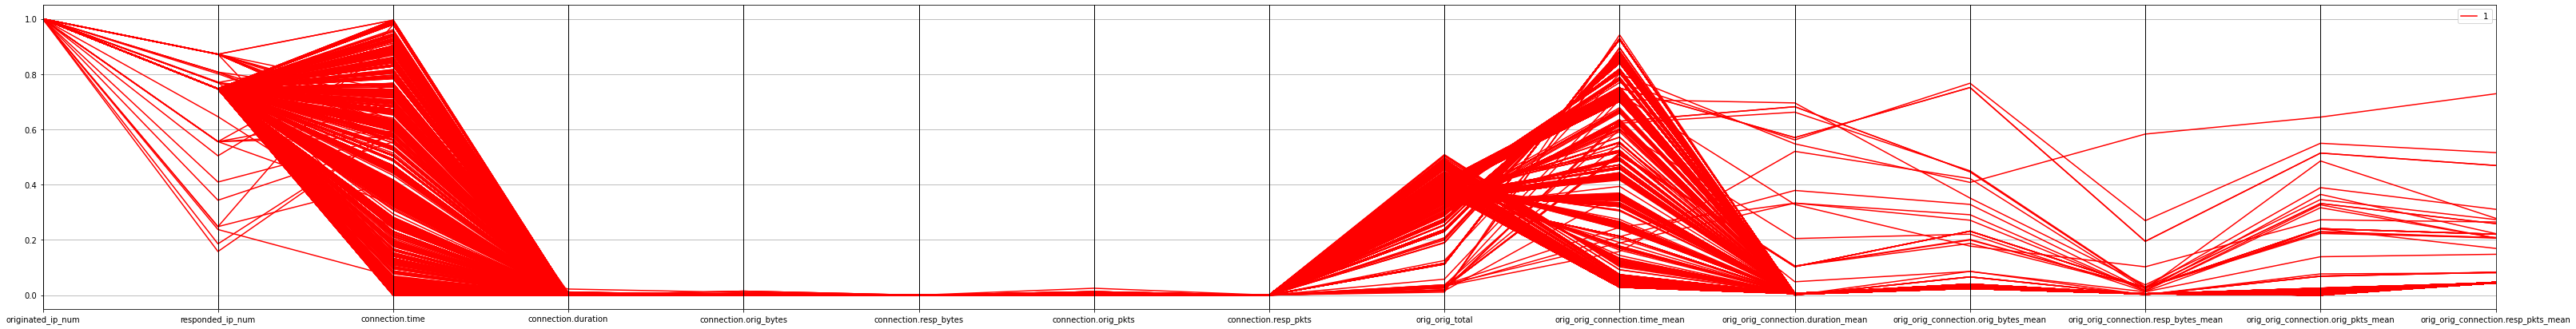

In [72]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()